In [2]:
import cvxpy as cp
import numpy as np
import math
from matplotlib.figure import Figure

%matplotlib inline

In [3]:
def solve_for_c(d, d_max, N, p):
    assert N >= d_max >= d + 1

    # filter times
    t = 2 * np.arange(1, 1 + N) / N - (2 * N + 1) / (2 * N)
    # vandermonde matrix
    vand = np.power(t.reshape(1, -1), np.arange(d_max).reshape(-1, 1))
    # compatibility conditions
    y = np.zeros(d_max)
    y[d] = math.factorial(d) / N ** d

    c = cp.Variable(N)
    objective = cp.Minimize(cp.pnorm(c, p))
    constraints = [vand @ c == y]
    prob = cp.Problem(objective, constraints)
    prob.solve(solver=cp.CLARABEL)

    return c.value

In [4]:
fig = Figure(figsize=(10, 6), dpi=300, constrained_layout=True)
ax = fig.add_subplot(2, 2, 1)
ax.set_title(r"$p = 1$")
ax.stem(t, solve_for_c(0, 4, 10, 1))
ax.set_yticks([])
ax.set_ylim(-0.5, 1)
ax.set_xlim(-1, 1)

ax = fig.add_subplot(2, 2, 2)
ax.set_title(r"$p = 2$")
ax.stem(t, solve_for_c(0, 4, 10, 2))
ax.set_yticks([])
ax.set_ylim(-0.5, 1)
ax.set_xlim(-1, 1)

ax = fig.add_subplot(2, 2, 3)
ax.set_title(r"$p = 4$")
ax.stem(t, solve_for_c(0, 4, 10, 4))
ax.set_yticks([])
ax.set_ylim(-0.5, 1)
ax.set_xlim(-1, 1)

ax = fig.add_subplot(2, 2, 4)
ax.set_title(r"$p = \infty$")
ax.stem(t, solve_for_c(0, 4, 10, np.inf))
ax.set_yticks([])
ax.set_ylim(-0.5, 1)
ax.set_xlim(-1, 1)

fig.suptitle(r"$d = 0, d_\mathrm{max} = 4, N = 10$")
fig.savefig("0,4,10.jpg")
fig

NameError: name 't' is not defined

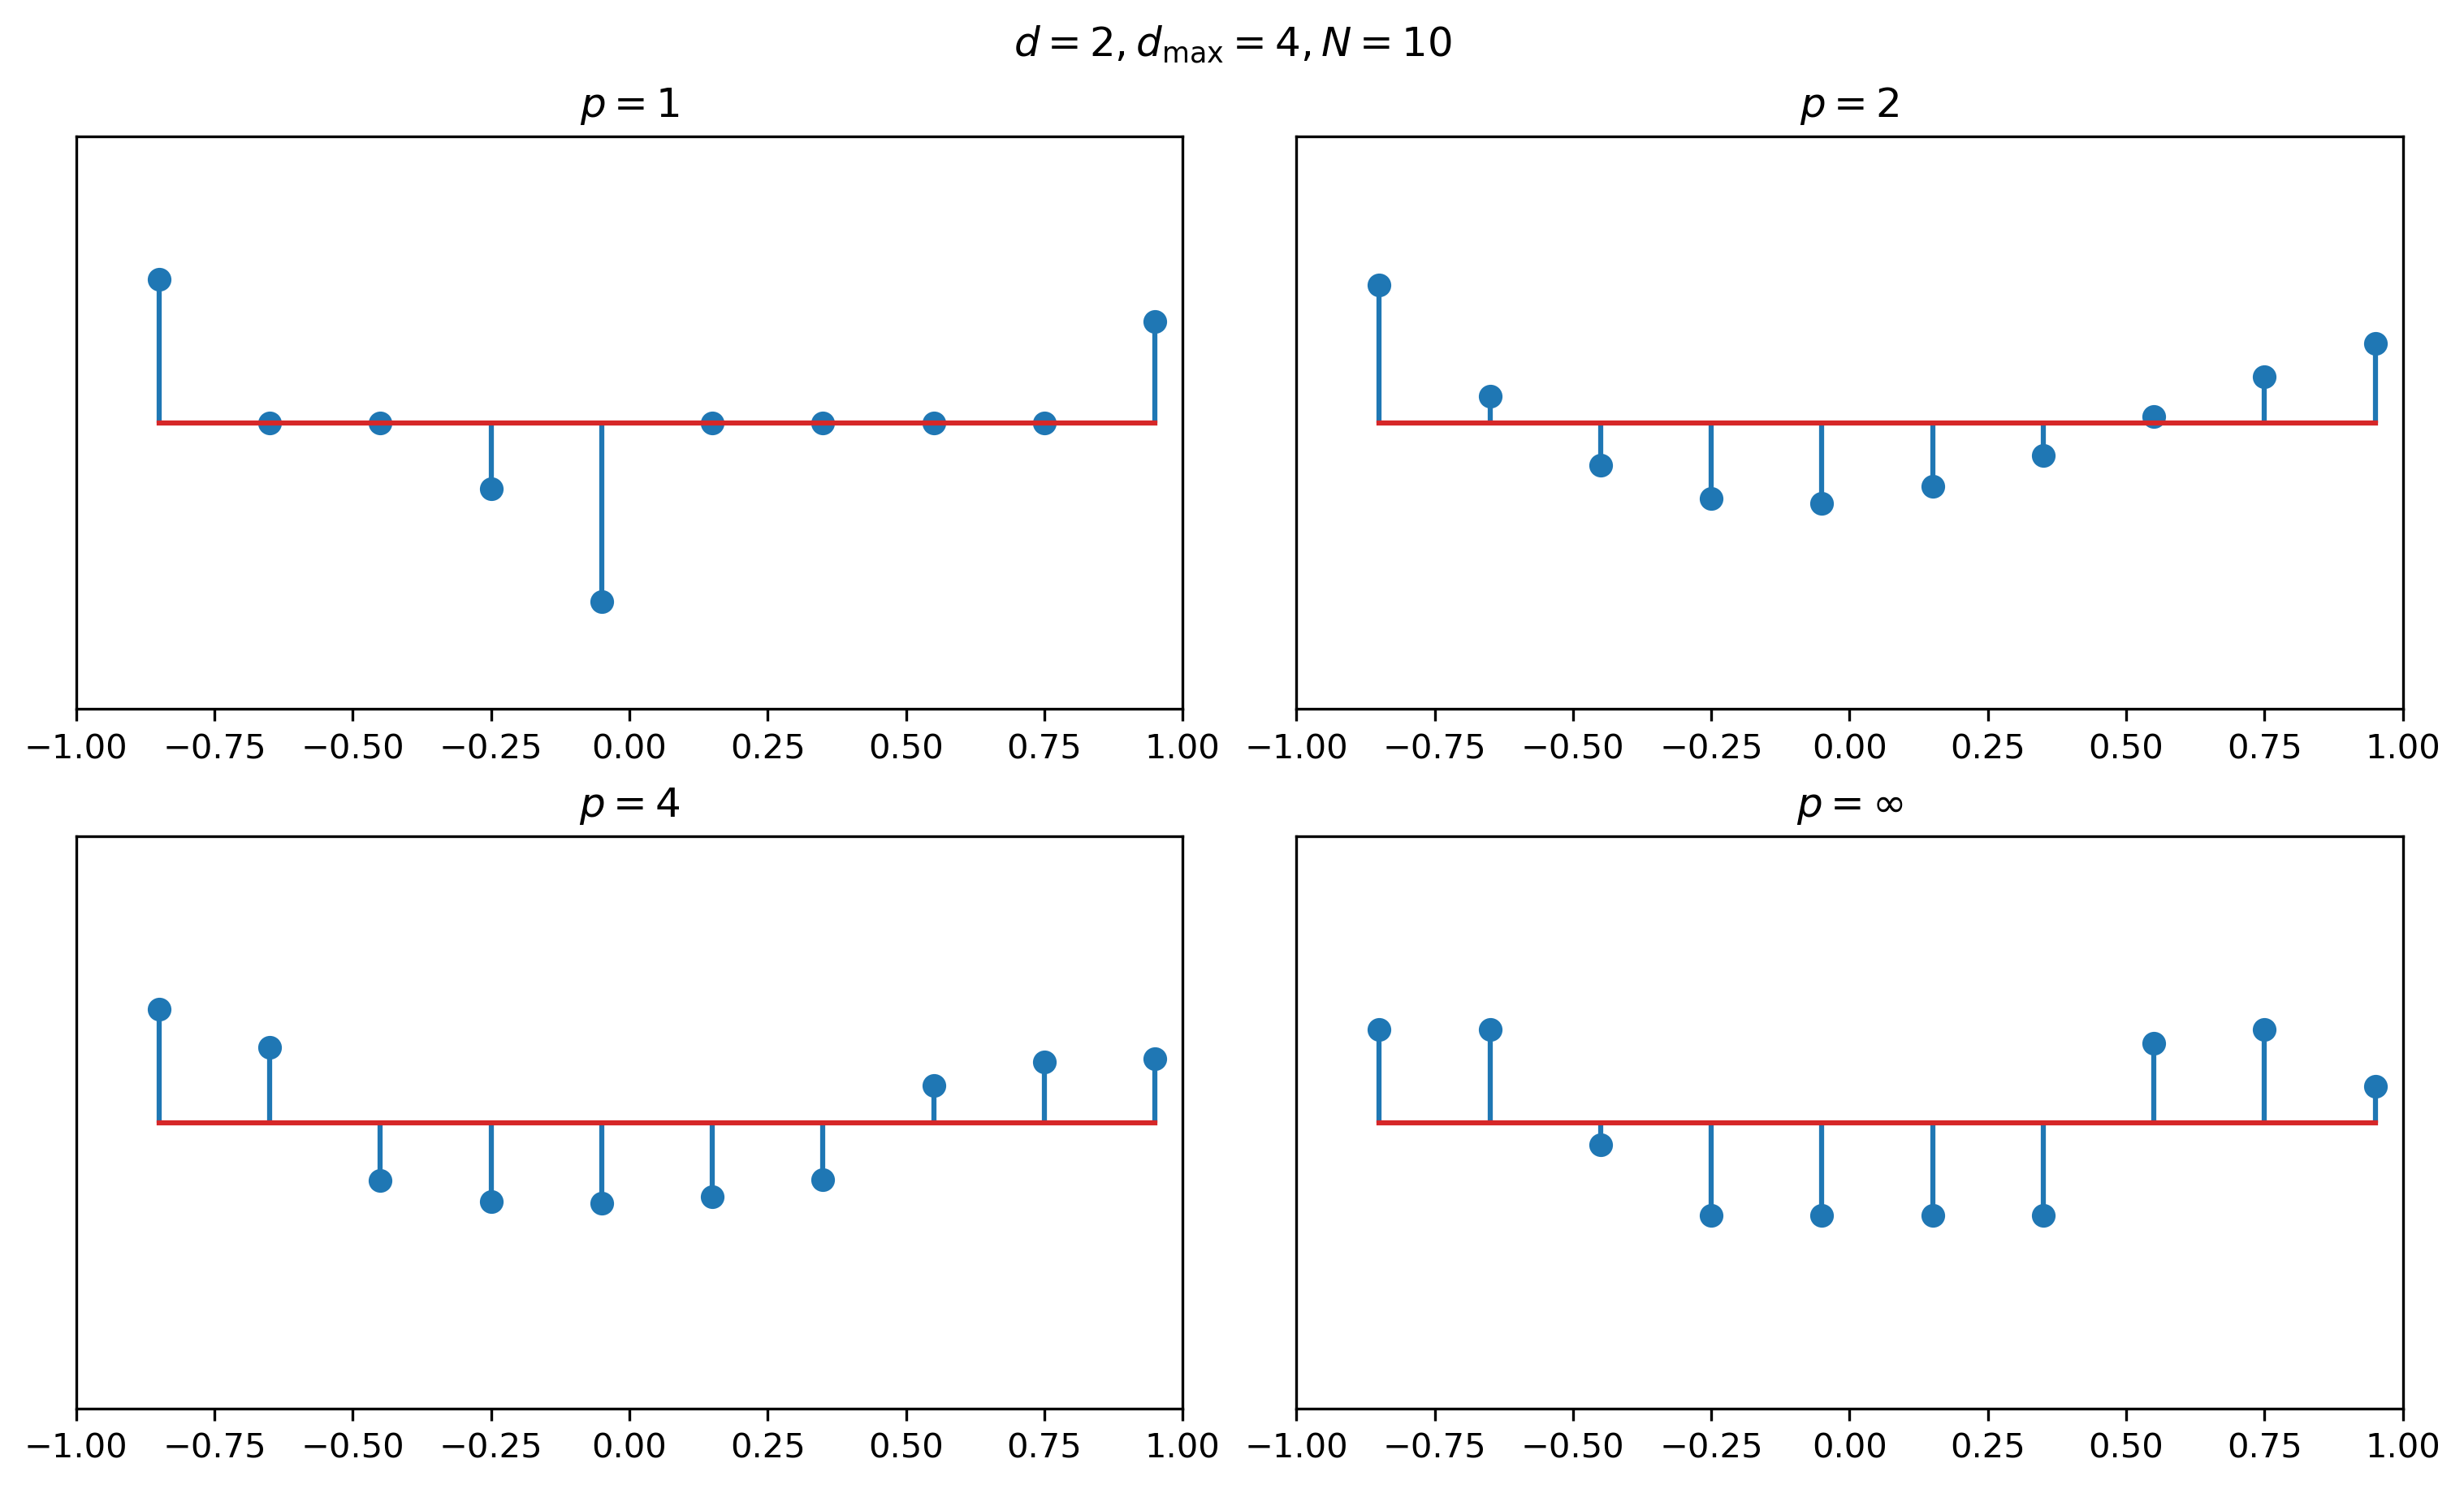

In [339]:
fig = Figure(figsize=(10, 6), dpi=300, constrained_layout=True)
ax = fig.add_subplot(2, 2, 1)
ax.set_title(r"$p = 1$")
ax.stem(t, solve_for_c(2, 4, 10, 1))
ax.set_yticks([])
ax.set_ylim(-3e-2, 3e-2)
ax.set_xlim(-1, 1)

ax = fig.add_subplot(2, 2, 2)
ax.set_title(r"$p = 2$")
ax.stem(t, solve_for_c(2, 4, 10, 2))
ax.set_yticks([])
ax.set_ylim(-3e-2, 3e-2)
ax.set_xlim(-1, 1)

ax = fig.add_subplot(2, 2, 3)
ax.set_title(r"$p = 4$")
ax.stem(t, solve_for_c(2, 4, 10, 4))
ax.set_yticks([])
ax.set_ylim(-3e-2, 3e-2)
ax.set_xlim(-1, 1)

ax = fig.add_subplot(2, 2, 4)
ax.set_title(r"$p = \infty$")
ax.stem(t, solve_for_c(2, 4, 10, np.inf))
ax.set_yticks([])
ax.set_ylim(-3e-2, 3e-2)
ax.set_xlim(-1, 1)

fig.suptitle(r"$d = 2, d_\mathrm{max} = 4, N = 10$")
fig.savefig("2,4,10.jpg")
fig